In [83]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('data/data.csv')

In [3]:
df.head()

,6. Merchant Attributes Merchant Name,5. Branch Attributes Branch Name,Merchant-Venue,99. Metrics Transaction Count,99. Metrics Sum of Commission,99. Metrics Total Lvn Earned In Aud,avg commish,avg reward rate,Reward ratio,Net Reward,...,Total GMV,Total Transaction,% Organic Volume,% Organic Count,Core user attributes User count,Core user attributes Total Lifetime Txn,Core user attributes Total Lifetime Gtv,total spend per user,Unnamed: 26,Unnamed: 27
0,Raan Kan Eang,Melbourne,Raan Kan Eang-Melbourne,3943,"$28,780.51","$22,969.91",25.00%,19.95%,5.05%,"$5,810.60",...,"$115,122.04",4274,96%,89%,329.0,2720.0,59279.48,180.180790,NaN,NaN
1,8Bit,Swanston Street,8Bit-Swanston Street,22671,"$27,134.16","$67,199.18",7.48%,18.51%,-11.04%,"-$40,065.01",...,"$363,083.41",24305,47%,28%,14779.0,30964.0,510302.97,34.528924,NaN,NaN
2,Laksa Bar,CBD,Laksa Bar-CBD,3617,"$20,146.72","$16,115.66",25.00%,20.00%,5.00%,"$4,031.06",...,"$80,586.89",4052,90%,82%,785.0,4606.0,100461.32,127.976204,NaN,NaN
3,Shanghai Dragon Dumpling House,CBD,Shanghai Dragon Dumpling House-CBD,2943,"$17,419.41","$17,061.86",25.00%,24.49%,0.51%,$357.55,...,"$69,677.65",3260,94%,89%,266.0,1994.0,45665.68,171.675489,NaN,NaN
4,Gotcha!,The Empire Gotcha,Gotcha!-The Empire Gotcha,19565,"$15,627.56","$51,310.19",8.60%,28.23%,-19.64%,"-$35,682.64",...,"$183,587.02",19920,74%,64%,4470.0,14998.0,202952.68,45.403284,NaN,NaN


In [4]:
def accumulate(values):
    accumulative = []
    for val in values:
        if accumulative == []:
            accumulative = [val]
        else:
            accumulative += [accumulative[-1] + val]
    return accumulative

def accumulative(values):
    points = [10,50,100,150,200,250,300,350,400,1411]
    accumulated = accumulate(values)
    for p in points:
        print('at {}'.format(p),accumulated[p])

In [5]:
def plot_distribution(X,xlabel='',ylabel='',title=''):
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(list(range(len(X))),X)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    
def plot_accumulative(X,xlabel='',ylabel='',title=''):
    fig, ax = plt.subplots(figsize=(15, 5))
    fig.subplots_adjust(bottom=0.15, left=0.2)
    ax.plot(list(range(len(accumulate(X)))),accumulate(X))
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

#### Sum of commission

In [6]:
commission_sum = df['99. Metrics Sum of Commission'].apply(lambda x:float(x[1:].replace(',',''))).values

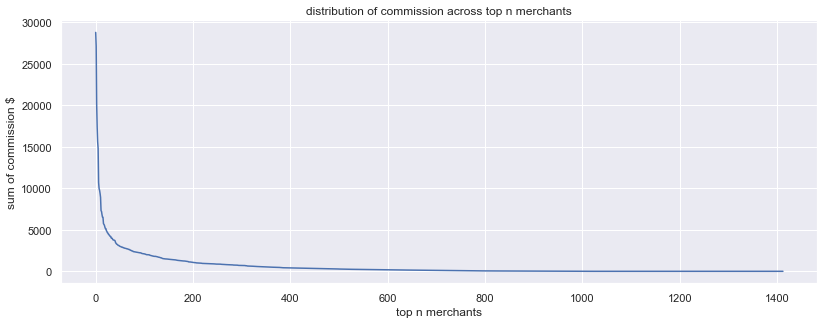

In [7]:
plot_distribution(commission_sum
                  ,xlabel='top n merchants'
                  ,ylabel='sum of commission $'
                  ,title='distribution of commission across top n merchants')

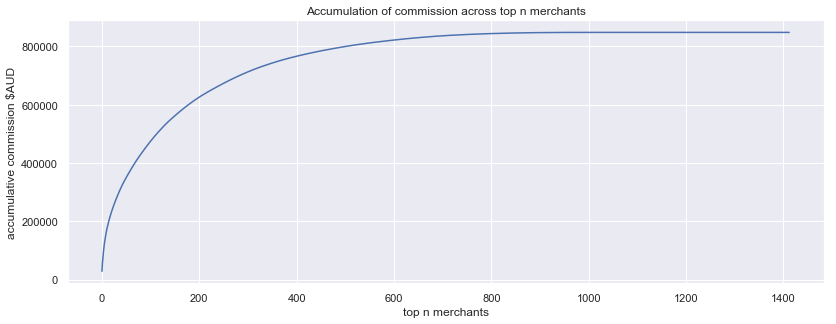

In [8]:
plot_accumulative(commission_sum
                 ,xlabel='top n merchants'
                 ,ylabel='accumulative commission $AUD'
                 ,title='Accumulation of commission across top n merchants')

#### Total Lvn Earned In Aud

In [9]:
total_lvn_earned = df['99. Metrics Total Lvn Earned In Aud'].apply(lambda x:float(x[1:].replace(',',''))).values
total_lvn_earned = sorted(total_lvn_earned,reverse=True)

Text(0.5, 1.0, 'distribution of lvn earned across top n merchants')

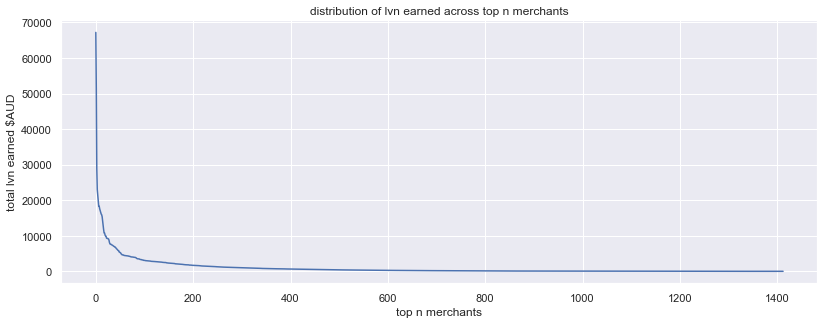

In [10]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(total_lvn_earned))),total_lvn_earned)
ax.set_xlabel('top n merchants')
ax.set_ylabel('total lvn earned $AUD')
ax.set_title('distribution of lvn earned across top n merchants')

Text(0.5, 1.0, 'Accumulation of earned lvn across top n merchants')

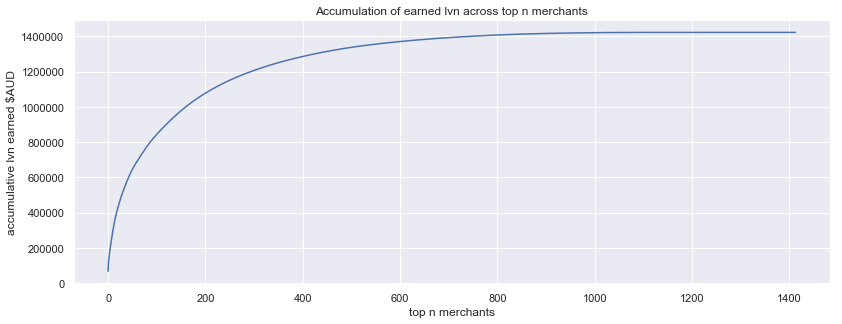

In [11]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(accumulate(total_lvn_earned)))),accumulate(total_lvn_earned))
ax.set_xlabel('top n merchants')
ax.set_ylabel('accumulative lvn earned $AUD')
ax.set_title('Accumulation of earned lvn across top n merchants')

In [12]:
net_reward = df['Net Reward'].apply(lambda x:float(str(x).replace('$','').replace(',',''))).values

Text(0.5, 1.0, 'distribution of net rewards by top merchants by commission')

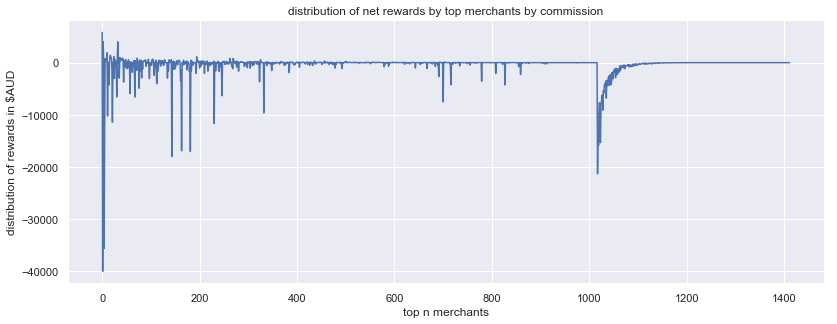

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(net_reward))),net_reward)
ax.set_xlabel('top n merchants')
ax.set_ylabel('distribution of rewards in $AUD')
ax.set_title('distribution of net rewards by top merchants by commission')

In [14]:
new_net_reward = sorted(net_reward)

Text(0.5, 1.0, 'distribution of net rewards')

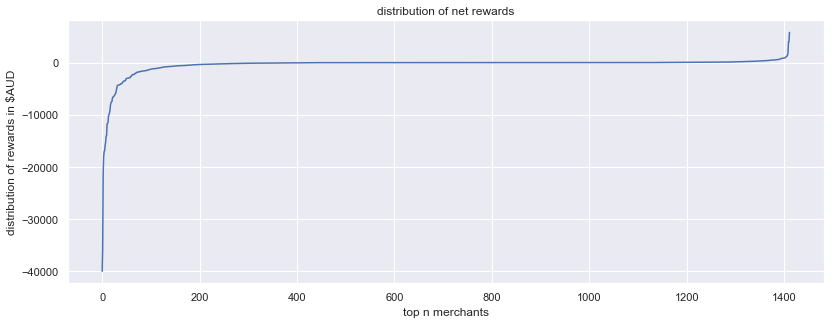

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(new_net_reward))),new_net_reward)
ax.set_xlabel('top n merchants')
ax.set_ylabel('distribution of rewards in $AUD')
ax.set_title('distribution of net rewards')

Text(0.5, 1.0, 'accumulated net rewards')

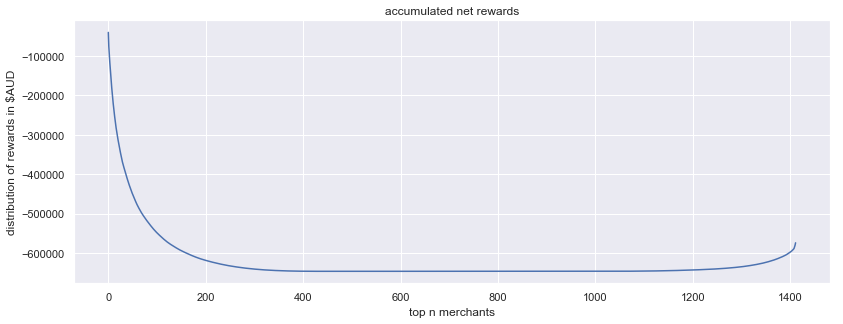

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(accumulate(new_net_reward)))),accumulate(new_net_reward))
ax.set_xlabel('top n merchants')
ax.set_ylabel('distribution of rewards in $AUD')
ax.set_title('accumulated net rewards')

In [17]:
accumulative(new_net_reward)

at 10 -220265.46999999997
at 50 -451323.7699999999
at 100 -549080.3199999996
at 150 -594358.2200000001
at 200 -618875.7199999996
at 250 -632965.0599999996
at 300 -640988.6799999996
at 350 -644920.4499999997
at 400 -646417.5699999998
at 1411 -574234.4000000001


### Promo

In [18]:
df.sort_values(by='99. Metrics Sum of Commission')
promo = df['Promo'].apply(lambda x:float(str(x).replace('$','').replace(',',''))).values

In [19]:
promo

array([  1677.3 , 177598.19,   3553.3 , ...,      0.  ,      0.  ,
            0.  ])

Text(0.5, 1.0, 'Promos spend for top merchants by commission')

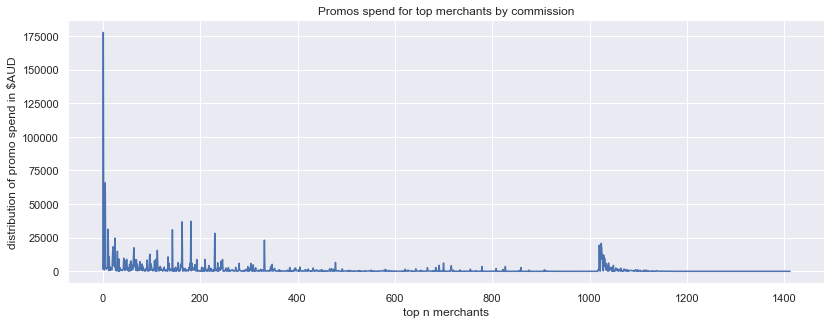

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(promo))),promo)
ax.set_xlabel('top n merchants')
ax.set_ylabel('distribution of promo spend in $AUD')
ax.set_title('Promos spend for top merchants by commission')

In [21]:
accumulative(promo)

at 10 307629.77
at 50 501912.58
at 100 668078.0300000003
at 150 798687.3900000006
at 200 956096.6900000005
at 250 1061865.2300000004
at 300 1100729.2499999998
at 350 1166942.15
at 400 1191725.99
at 1411 1543931.679999998


### Promo + Reward

In [55]:
df['Promo + Reward'] = df['Promo + Reward'].apply(lambda x:float(str(x).replace('$','').replace(',',''))).values

Text(0.5, 1.0, 'distribution of promo plus reward by top merchants by commission')

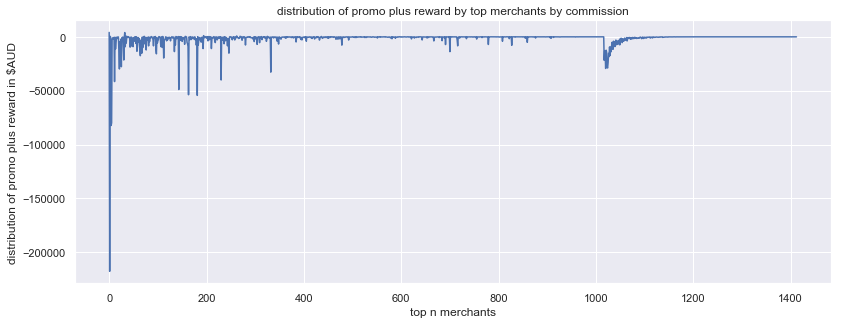

In [23]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(promo_reward))),promo_reward)
ax.set_xlabel('top n merchants')
ax.set_ylabel('distribution of promo plus reward in $AUD')
ax.set_title('distribution of promo plus reward by top merchants by commission')

In [58]:
df.sort_values(by='Promo + Reward',ascending=True).head(1)

,6. Merchant Attributes Merchant Name,5. Branch Attributes Branch Name,Merchant-Venue,99. Metrics Transaction Count,99. Metrics Sum of Commission,99. Metrics Total Lvn Earned In Aud,avg commish,avg reward rate,Reward ratio,Net Reward,...,Total GMV,Total Transaction,% Organic Volume,% Organic Count,Core user attributes User count,Core user attributes Total Lifetime Txn,Core user attributes Total Lifetime Gtv,total spend per user,Unnamed: 26,Unnamed: 27
1,8Bit,Swanston Street,8Bit-Swanston Street,22671,"$27,134.16","$67,199.18",7.48%,18.51%,-11.04%,"-$40,065.01",...,"$363,083.41",24305,47%,28%,14779.0,30964.0,510302.97,34.528924,NaN,NaN


In [24]:
accumulative(promo_reward)

at 10 -383544.73000000004
at 50 -608486.5000000003
at 100 -805393.1400000005
at 150 -967727.1800000009
at 200 -1170380.96
at 250 -1306069.9499999997
at 300 -1349107.83
at 350 -1432287.2200000002
at 400 -1461195.1400000001
at 1411 -2119192.0600000042


### Net Position: GMV ratio

In [59]:
df['Net Position:GMV Ratio'] = df['Net Position:GMV Ratio'].replace('#DIV/0!',0.)
df.sort_values(by='99. Metrics Sum of Commission',inplace=True,ascending=False)
pos_gmv = df['Net Position:GMV Ratio'].apply(lambda x:float(str(x)
                                                            .replace('$','')
                                                            .replace(',','')
                                                            .replace('%',''))/100).values

In [60]:
pos_gmv

array([-0.3119, -0.1538, -0.0602, ...,  0.    ,  0.    ,  0.    ])

Text(0.5, 1.0, 'Net Position:GMV ratio for merchants ranked by sum of commission')

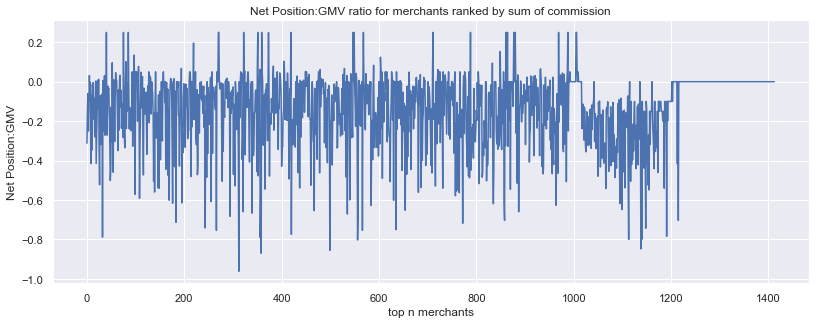

In [61]:
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(list(range(len(pos_gmv))),pos_gmv)
ax.set_xlabel('top n merchants')
ax.set_ylabel('Net Position:GMV')
ax.set_title('Net Position:GMV ratio for merchants ranked by sum of commission')

### Organic

In [62]:
organic = df['Organic'].apply(lambda x:float(x.replace('$','')
                                        .replace('.','')
                                        .replace(',','')))
organic[:3]

211    457248.0
212    323142.0
213    863430.0
Name: Organic, dtype: float64

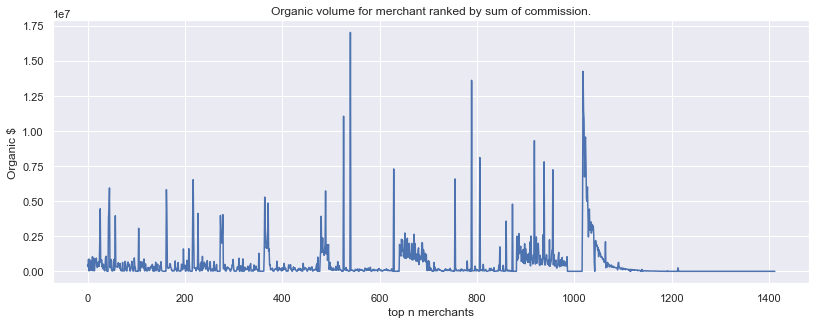

In [63]:
plot_distribution(organic
                ,xlabel='top n merchants'
                ,ylabel='Organic $'
                ,title='Organic volume for merchant ranked by sum of commission.')

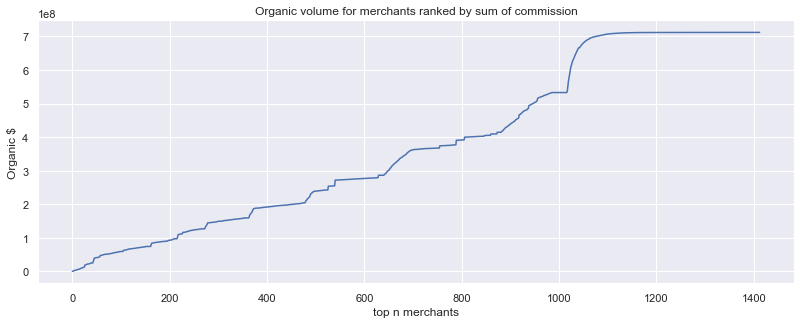

In [64]:
plot_accumulative(organic,xlabel='top n merchants'
                  ,ylabel='Organic $',title='Organic volume for merchants ranked by sum of commission')

In [39]:
promo_count = df['Count of Promo Transactions']

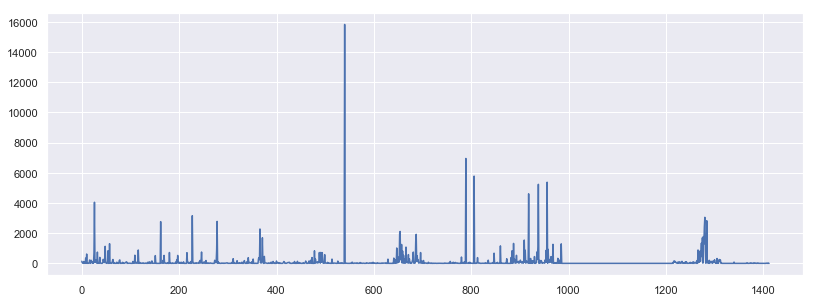

In [40]:
plot_distribution(promo_count)

In [84]:
df.sort_values(by='Count of Promo Transactions',ascending=False).head(3)

,6. Merchant Attributes Merchant Name,5. Branch Attributes Branch Name,Merchant-Venue,99. Metrics Transaction Count,99. Metrics Sum of Commission,99. Metrics Total Lvn Earned In Aud,avg commish,avg reward rate,Reward ratio,Net Reward,...,Total GMV,Total Transaction,% Organic Volume,% Organic Count,Core user attributes User count,Core user attributes Total Lifetime Txn,Core user attributes Total Lifetime Gtv,total spend per user,Unnamed: 26,Unnamed: 27
1,8Bit,Swanston Street,8Bit-Swanston Street,22671,"$27,134.16","$67,199.18",7.48%,18.51%,-11.04%,"-$40,065.01",...,"$363,083.41",24305,47%,28%,14779.0,30964.0,510302.97,34.528924,NaN,NaN
4,Gotcha!,The Empire Gotcha,Gotcha!-The Empire Gotcha,19565,"$15,627.56","$51,310.19",8.60%,28.23%,-19.64%,"-$35,682.64",...,"$183,587.02",19920,74%,64%,4470.0,14998.0,202952.68,45.403284,NaN,NaN
5,8Bit,Darling Square,8Bit-Darling Square,9313,"$14,812.75","$28,844.05",9.60%,18.69%,-9.09%,"-$14,031.29",...,"$154,365.89",10107,52%,35%,5935.0,18541.0,293362.94,49.429308,NaN,NaN
